In [76]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
data = pd.read_csv('train.csv')

In [81]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,FareBinary
count,891,891,891,204,889,891
unique,891,2,681,147,3,2
top,"Toufik, Mr. Nakli",male,1601,C23 C25 C27,S,low
freq,1,577,7,4,644,838


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [6]:
data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
data[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [17]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

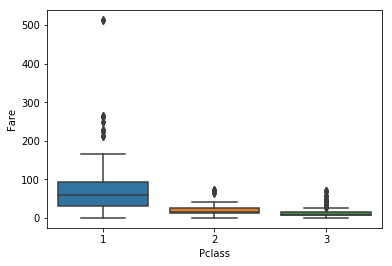

In [36]:
ax = sb.boxplot(x=data['Pclass'], y=data['Fare'])

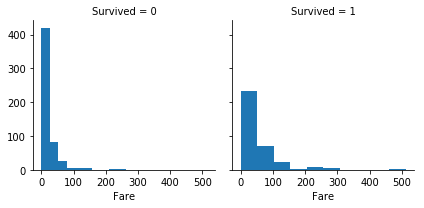

In [45]:
#low_fare = data['Fare'] > 50
g = sb.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

In [72]:
data['FareBins'] = pd.qcut(data['Fare'], 4, labels=np.arange(4))
data[['FareBins','Survived']].groupby(['FareBins'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBins,Survived
3,3,0.581081
2,2,0.454955
1,1,0.303571
0,0,0.197309


In [73]:
data['AgeBins'] = pd.cut(data['Age'], 5, labels=np.arange(5))
data[['AgeBins','Survived']].groupby(['AgeBins'], as_index=False).mean().sort_values(by='AgeBins',ascending=True)

,AgeBins,Survived
0,0,0.550000
1,1,0.369942
2,2,0.404255
3,3,0.434783
4,4,0.090909


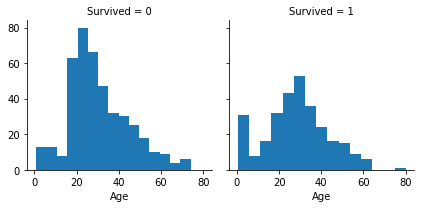

In [50]:
g = sb.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=15)

In [54]:
data[['Fare','Pclass']].corr()

,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


In [82]:
features = ['Pclass','Sex','Age','Fare','Embarked']
target = 'Survived'

columns = np.append(features, target)
clf_data = pd.DataFrame(data[columns],columns=columns)
clf_data.Age = clf_data.Age.fillna(np.mean(clf_data.Age))
clf_data.Embarked = clf_data.Embarked.fillna('S')

clf_data['Age'] = pd.cut(data['Age'], 5, labels=np.arange(5))
clf_data['Fare'] = pd.cut(data['Fare'], 4, labels=np.arange(4))

# transform features to numerical categories
le = preprocessing.LabelEncoder()
for c in columns:
    clf_data[c] = le.fit_transform(clf_data[c])
    #print(list(le.classes_))
    
# encode categorial features as multiple binary features
enc = preprocessing.OneHotEncoder()
binary_features = enc.fit_transform(clf_data[features])

In [78]:
clf_data.isnull().any()

Pclass      False
Sex         False
Age         False
Fare        False
Embarked     True
Survived    False
dtype: bool

In [83]:
clf = DecisionTreeClassifier(random_state=0)
# compute model and perform 10-fold cross valdation (using the numerical features)
scores = cross_val_score(clf, clf_data[features], clf_data[target], cv=10)
print("cross-val scores:", scores)
print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

# compute model and perform 10-fold cross valdation (using the binary features)
scores = cross_val_score(clf, binary_features, clf_data[target], cv=10)
print("cross-val scores:", scores)
print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

cross-val scores: [0.77777778 0.77777778 0.76404494 0.85393258 0.83146067 0.80898876
 0.82022472 0.7752809  0.78651685 0.81818182]
mean =  0.801418681193962 , std =  0.027878372135796012 

cross-val scores: [0.81111111 0.8        0.7752809  0.86516854 0.84269663 0.82022472
 0.83146067 0.80898876 0.80898876 0.84090909]
mean =  0.8204829190784247 , std =  0.02417207982999726 

